In [2]:
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [3]:
# reading the store csv file

missing_values=["n/a", "na", "undefined"]
df = pd.read_csv("../data/data.csv", na_values=missing_values)
            
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour
0,1.097926,-0.015563,0.153713,1.668646,0.595070,1.025848,0.554336,-0.799047,0.676000,-0.046371,-0.072291,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
1,1.013589,-0.571733,0.867190,0.346449,0.595070,-0.502027,-0.304790,0.491064,-1.114302,-0.054643,-0.080251,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
2,-0.287613,0.469994,0.371965,-1.203089,0.807169,1.025848,-1.378697,-0.799047,0.676000,-0.050426,-0.076352,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
3,0.032862,-1.666100,0.996380,-1.227972,1.692827,-2.793841,2.916933,4.361398,0.676000,0.107717,0.096648,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-1.949214
4,-0.234164,0.056072,0.867190,0.346449,1.692827,-0.502027,-0.304790,0.491064,-1.114302,-0.059704,-0.075183,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-1.949214


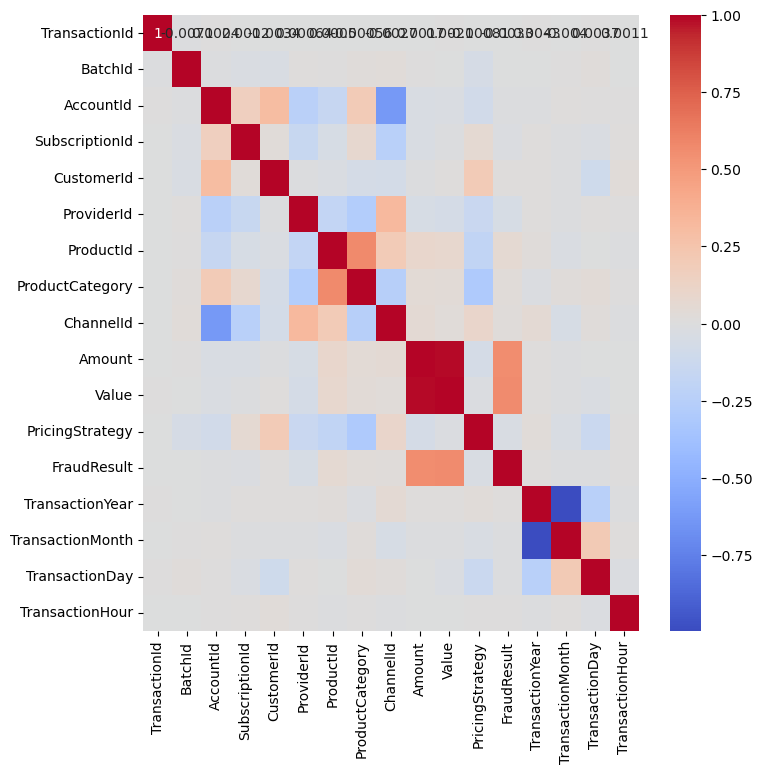

In [4]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df.corr(),
            cmap = 'coolwarm', 
            annot = True)

In [6]:
train, test = sc.split_df(df, 'PricingStrategy', ratio = 0.7, seed = 999).values()

# Function to compute WOEs
var = train.drop(['PricingStrategy', 'Amount', 'Value'], axis = 1).columns
y_var = train['PricingStrategy']

def woe_num(x, y):
  bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
  global breaks 
  breaks = {}
  for i in x:
    bin_object.fit(train[[y, i]])
    breaks[i] = (bin_object.bins[1:-1].tolist())
  return breaks
  
woe_num(var, 'PricingStrategy')

{'TransactionId': [1.7320327017195882],
 'BatchId': [1.731596085483697],
 'AccountId': [1.2713960739871475],
 'SubscriptionId': [1.77157140100716],
 'CustomerId': [1.7004702550975006],
 'ProviderId': [1.0258481573902032],
 'ProductId': [4.205621731177138],
 'ProductCategory': [4.36139825557334],
 'ChannelId': [4.256601928361603],
 'FraudResult': [22.24090895372945],
 'TransactionYear': [1.005787061081215],
 'TransactionMonth': [1.040098062569211],
 'TransactionDay': [1.684422684998927],
 'TransactionHour': [2.177101361317592]}